# Подгрузка данных и импорт библиотек

In [2]:
# импортируем библиотеки для работы с данными, математических преобразований
# и для визуализации
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# читаем в переменную датасет для работы с данными
sber_data = pd.read_csv('data/sber_data.csv', sep=',')

# Как обнаружить пропуски

## .isnull()

In [3]:
# возвращаем булевый датафрейм, где True означает пропуск данных, 
# для того чтобы этому промежуточному этапу избавиться от пропусков
display(sber_data.isnull().tail())

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
30466,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30467,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30468,False,False,True,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
30469,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30470,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Список столбцов с пропусками

In [4]:
# выведем среднее арифметическое значение столбцов с пропусками 
# для того чтобы увидеть сколько процентов пропусков имеется в признаке
cols_null_percent = sber_data.isnull().mean() * 100
# для лучшего понимания отсортируем данные с верху вниз 
# и уберем признаки у которых значение 0 
# для того чтобы начать обрабатывать только столбцы с пропусками
cols_with_null = cols_null_percent[cols_null_percent > 0].\
    sort_values(ascending=False)
display(cols_null_percent)
display(cols_with_null)    


id                    0.000000
full_sq               0.000000
life_sq              20.947786
floor                 0.548062
sub_area              0.000000
                       ...    
theater_km            0.000000
museum_km             0.000000
ecology               0.000000
mosque_count_1000     0.000000
price_doc             0.000000
Length: 61, dtype: float64

hospital_beds_raion          47.392603
preschool_quota              21.948738
school_quota                 21.938893
life_sq                      20.947786
floor                         0.548062
metro_min_walk                0.082045
metro_km_walk                 0.082045
railroad_station_walk_km      0.082045
railroad_station_walk_min     0.082045
dtype: float64

# Столбчатая диаграмма пропусков

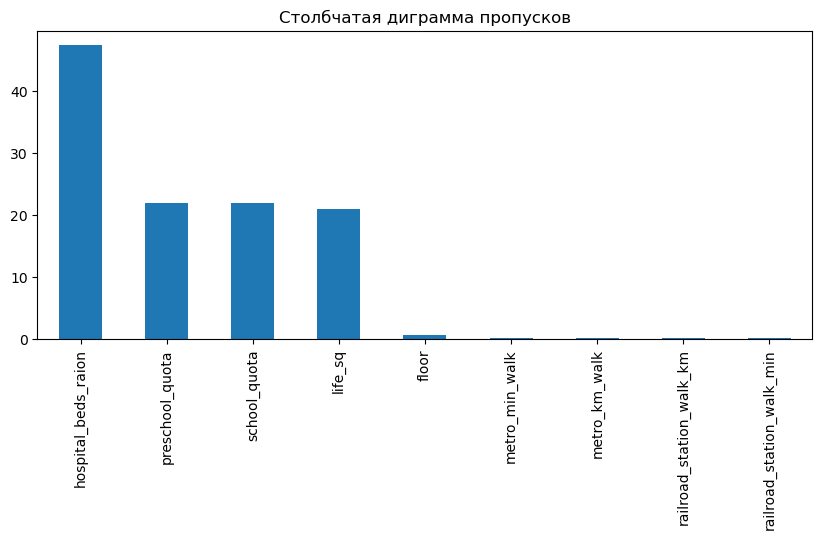

In [5]:
# для лучшего и визульного понимания создаем столбчатую диаграмму
cols_with_null.plot(
    kind='bar',
    title='Столбчатая диграмма пропусков',
    figsize=(10, 4)
);

# Тепловая карта пропусков

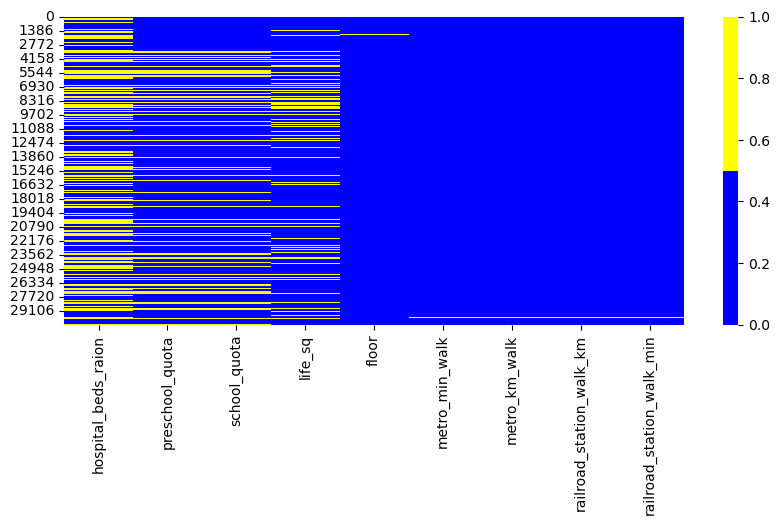

In [6]:
# проверям на пропуски и для наглядности строим тепловую карту, 
# где желтый - пропуск, а синий - есть данные 
# создаем свою цветовую палитру,  чтобы их использовать при построении графика
colors = ['blue', 'yellow']
cols = cols_with_null.index
fig = plt.figure(figsize=(10, 4))
ax = sns.heatmap(
    data=sber_data[cols].isnull(),
    # использую метод seaborn для пользования только своей цветовой палитрой
    cmap=sns.color_palette(colors)
)